<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#3/10/2023, Let's begin
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#upload the file in advance
im = plt.imread("AnalogScan.jpg", ".jpg")

In [3]:
im.ndim

3

In [4]:
im.shape

(588, 468, 3)

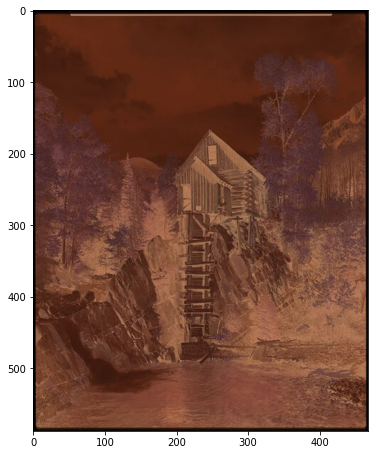

In [5]:
plt.figure(figsize = (6,10))
plt.imshow(im)
plt.show()

In [19]:
#3/13/2023 let's start again
neg = 255*np.ones(im.shape, dtype=int) -im

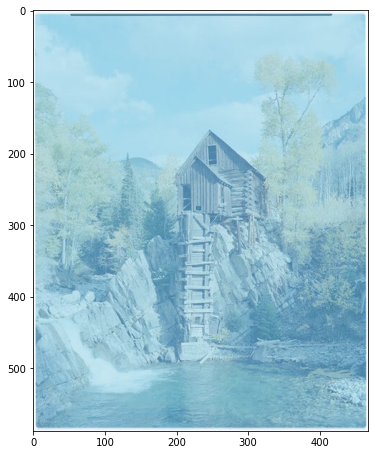

In [20]:
plt.figure(figsize = (6,10))
plt.imshow(neg)
plt.show()

In [21]:
#3/14/2023
grayeq = neg@np.array([1/3,1/3,1/3])
graybetter = neg@np.array([0.2989,0.5870,0.114])

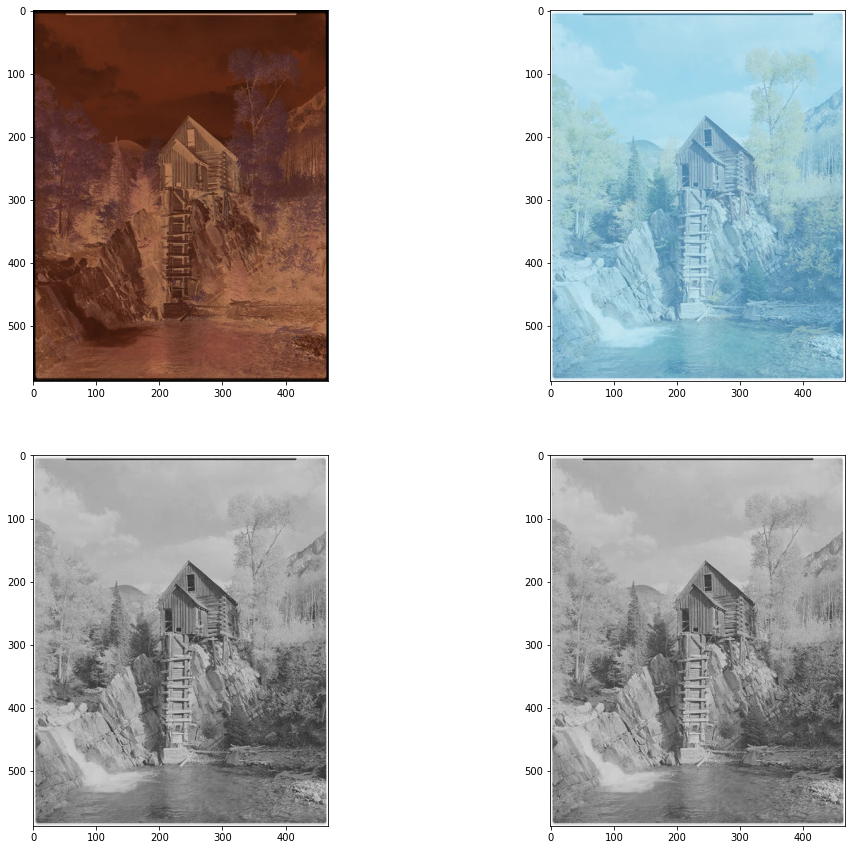

In [42]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(im)
axarr[0,1].imshow(neg)
axarr[1,0].imshow(graybetter, cmap = 'gray')
axarr[1,1].imshow(grayeq, cmap = 'gray')
plt.show()

In [34]:
grayeq[359,40],graybetter[359,40] 
#as you can see, they're for sure different, but not that much!!

(145.33333333333331, 141.036)

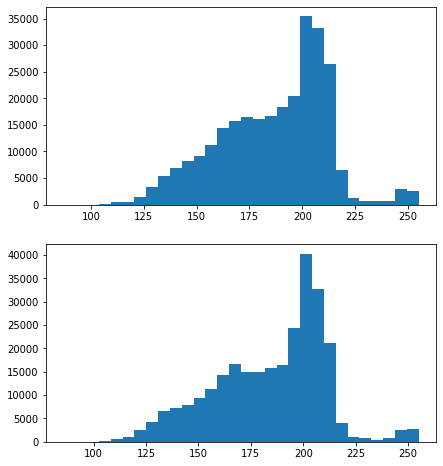

In [45]:
f, axarr = plt.subplots(2,figsize=(7,8))
axarr[0].hist(grayeq.flatten(), bins = 30)
axarr[1].hist(graybetter.flatten(), bins = 30)
plt.show()

In [ ]:
#

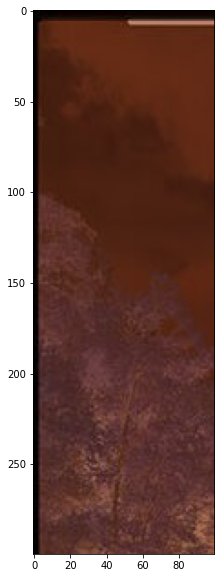

In [ ]:

plt.figure(figsize = (6,10))
plt.imshow(im[:300,:100,:])
plt.show()

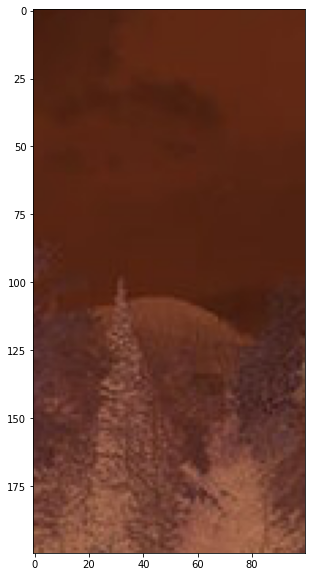

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[100:300,100:200,:])
plt.show()

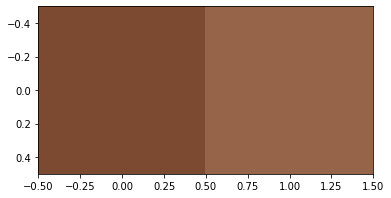

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[299:300,98:100,:])
plt.show()

In [ ]:
im[299:300,98:100,:]

array([[[124,  74,  49],
        [150, 100,  73]]], dtype=uint8)

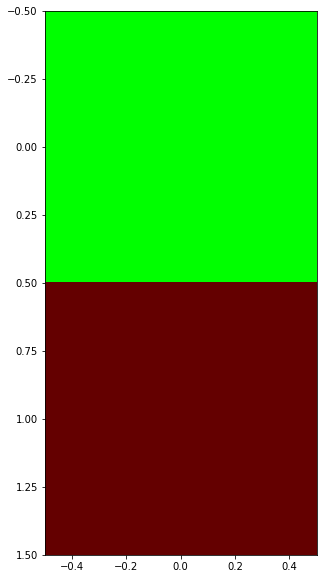

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(np.array([[[0, 255, 0]],[[100,0,0]]]))
plt.show()

In [ ]:
np.ones((2,2,2))@np.ones((2,2,2))

array([[[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]]])